In [44]:
#import modul yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import zipfile
import shutil

In [48]:
#download file untuk data set
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-07 04:45:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.78MB/s    in 48s     

2020-07-07 04:46:30 (6.43 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [49]:
#ekstraksi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [50]:
#cek isi di dalam folder
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper', 'rps-cv-images']

In [52]:
#buat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

#datasets harus dibagi menjadi trainset dan validation set
#pembuatan folder train set dan validation set
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [53]:
#definisikan direktori yang dibutuhkan
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [54]:
#membuat direktori rock, paper dan scissor menjadi data train (80%) dan data validation (20%)
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [55]:
train_rock = os.path.join(train_dir, 'rock')
validation_rock = os.path.join(validation_dir, 'rock')

train_paper = os.path.join(train_dir, 'paper')
validation_paper = os.path.join(validation_dir, 'paper')

train_scissors = os.path.join(train_dir, 'scissors')
validation_scissors = os.path.join(validation_dir, 'scissors')

# membuat direktori baru pada train dan validation
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)

if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)

if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)

In [56]:
#melakukan copy data train dan data validation ke direktori baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))

for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))

for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

In [57]:
#cek di dalam folder
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [58]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [59]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

569

In [60]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

143

In [61]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

600

In [62]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

150

In [63]:
580+146+569+143+600+150

2188

In [64]:
#Membuat image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [71]:
#karena ada tiga kelas maka class_mode nya categorical
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [76]:
#membuat CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])



In [77]:
#loss fucntion dan optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [79]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 42s - loss: 0.1477 - accuracy: 0.9556 - val_loss: 0.0579 - val_accuracy: 0.9937
Epoch 2/20
25/25 - 43s - loss: 0.0838 - accuracy: 0.9712 - val_loss: 0.0283 - val_accuracy: 0.9937
Epoch 3/20
25/25 - 43s - loss: 0.0867 - accuracy: 0.9825 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 4/20
25/25 - 42s - loss: 0.0476 - accuracy: 0.9835 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 5/20
25/25 - 42s - loss: 0.0773 - accuracy: 0.9797 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 6/20
25/25 - 42s - loss: 0.0666 - accuracy: 0.9759 - val_loss: 0.0448 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 42s - loss: 0.0679 - accuracy: 0.9835 - val_loss: 0.0218 - val_accuracy: 0.9937
Epoch 8/20
25/25 - 42s - loss: 0.0476 - accuracy: 0.9825 - val_loss: 0.0603 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 42s - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0791 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 42s - loss: 0.0240 - accuracy: 0.9937 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 11/

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
01dM3ewPIsnBICu1.png
rock


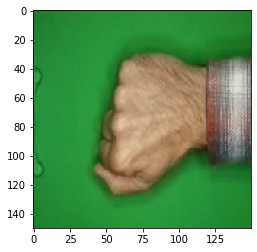

In [82]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')